![Neuron_Labs.png](Neuron_Labs.png)

<H1><center>Week-1 Task
<h3><center>House Price Prediction

<h1> Importing all required packages

In [131]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sns
import matplotlib.ticker as ticker

sns.set(style="whitegrid",font_scale=1.5)


<h1>Reading Data 

In [132]:
data = pd.read_csv('Housing.csv')
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [133]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


<h1> Visualising the Price Density 

Text(0, 0.5, 'Dencity')

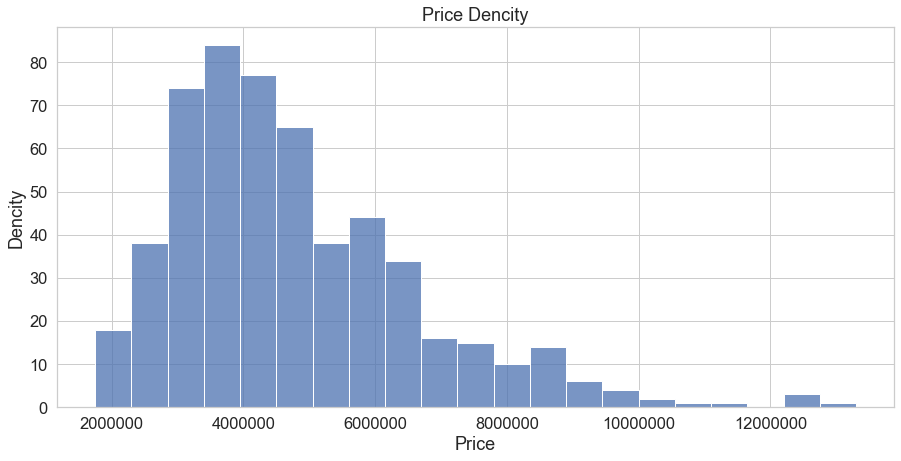

In [134]:
plt.figure(figsize=(15,7))
plt.gca().get_xaxis().set_major_formatter(ticker.FormatStrFormatter('%d'))
sns.histplot(data.price,)
plt.title('Price Dencity')
plt.xlabel('Price')
plt.ylabel('Dencity')

<h1> visualising Area vs Price

Text(0, 0.5, 'Price')

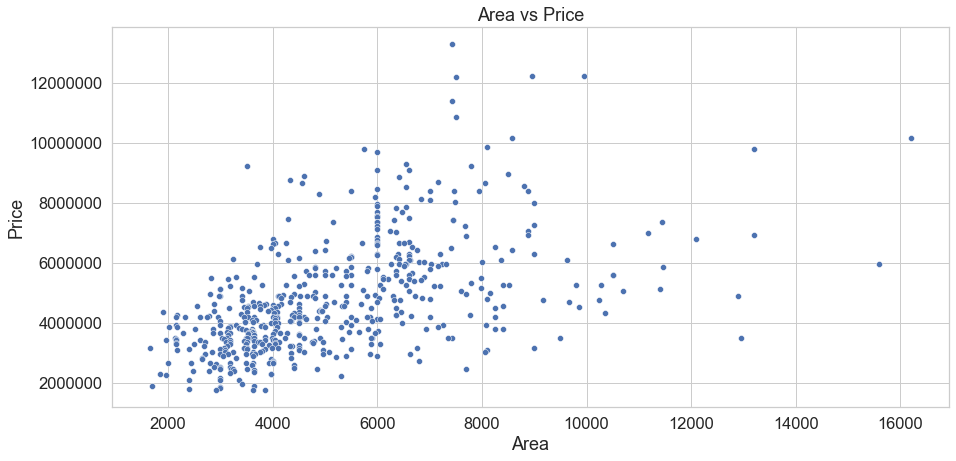

In [135]:
plt.figure(figsize=(15,7))
plt.gca().get_yaxis().set_major_formatter(ticker.FormatStrFormatter('%d'))
sns.scatterplot(x=data.area,y=data.price)
plt.title('Area vs Price')
plt.xlabel('Area')
plt.ylabel('Price')

<h1> Visualising the Bedrooms Density

Text(0, 0.5, 'Dencity')

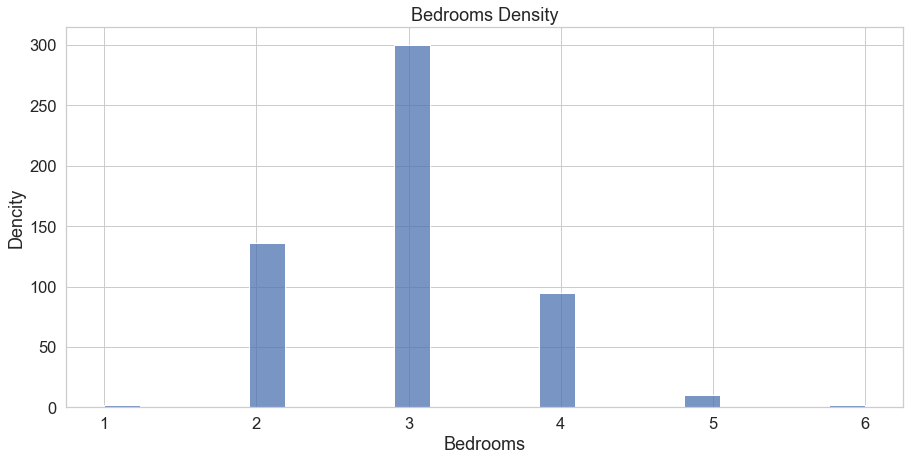

In [136]:
plt.figure(figsize=(15,7))
sns.histplot(data.bedrooms)
plt.title('Bedrooms Density')
plt.xlabel('Bedrooms')
plt.ylabel('Dencity')


<h1><h1> Visualising Bedrooms vs Price

Text(0.5, 1.0, 'Bedrooms vs Price')

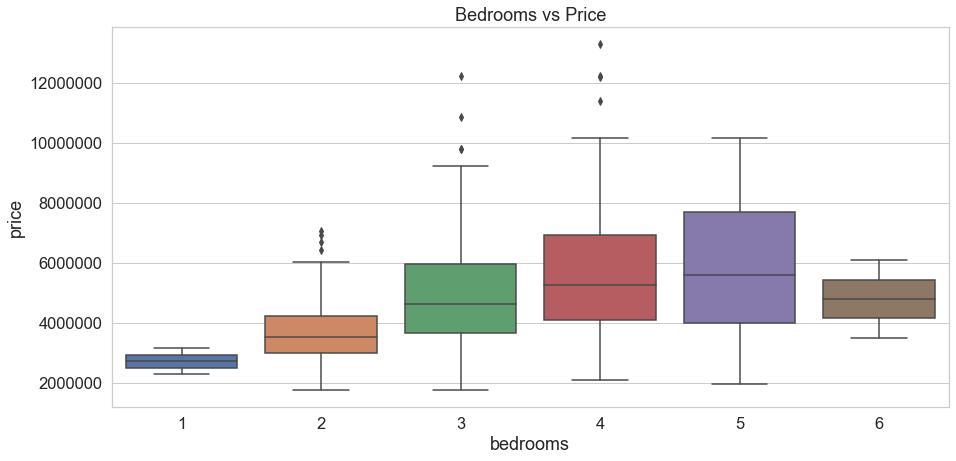

In [137]:
plt.figure(figsize=(15,7))
plt.gca().get_yaxis().set_major_formatter(ticker.FormatStrFormatter('%d'))
sns.boxplot(x=data.bedrooms,y=data.price)
plt.title('Bedrooms vs Price')

<h1><h1> Visualising Car Parking Density

Text(0, 0.5, 'Dencity')

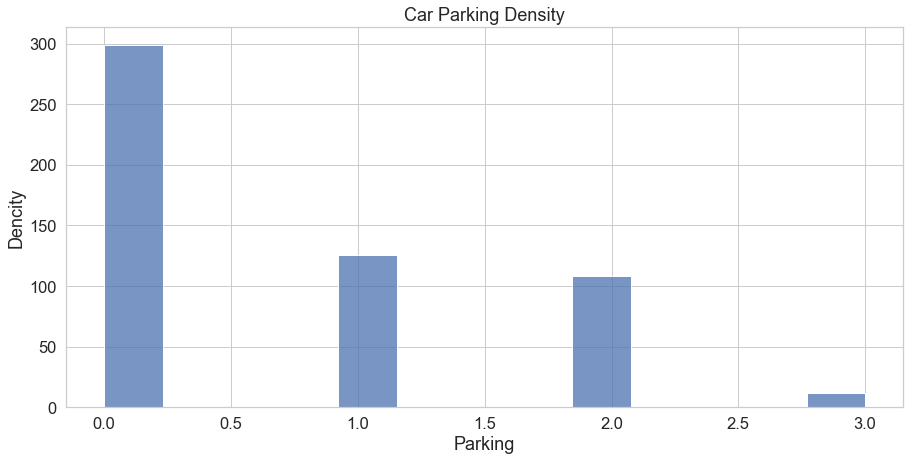

In [138]:
plt.figure(figsize=(15,7))
sns.histplot(data.parking)
plt.title('Car Parking Density')
plt.xlabel('Parking')
plt.ylabel('Dencity')


<h1>Visualising Parking vs Price

Text(0.5, 1.0, 'Parking vs Price')

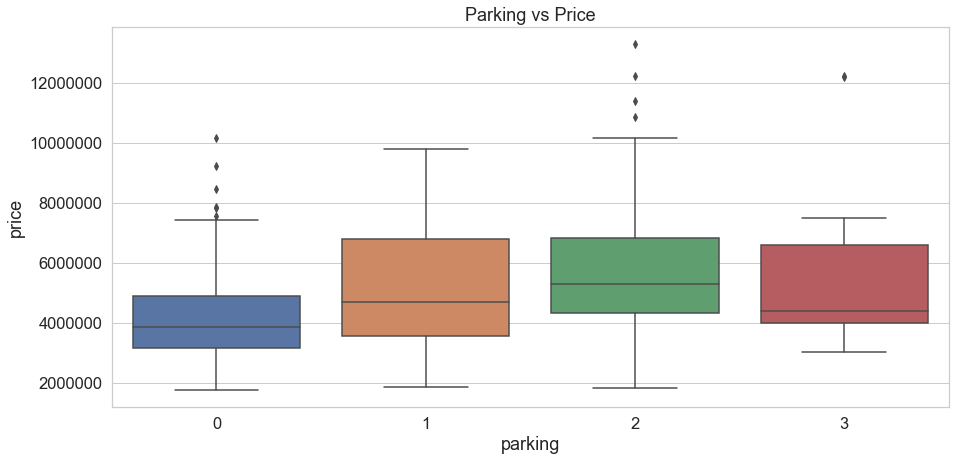

In [139]:
plt.figure(figsize=(15,7))
plt.gca().get_yaxis().set_major_formatter(ticker.FormatStrFormatter('%d'))
sns.boxplot(x=data.parking,y=data.price)
plt.title('Parking vs Price')

<h1> Selecting the Features 

In [140]:
X = data[['area','bedrooms','parking']] # independent variables
Y = data.price # dependent variables
X.describe()

,area,bedrooms,parking
count,545.000000,545.000000,545.000000
mean,5150.541284,2.965138,0.693578
std,2170.141023,0.738064,0.861586
min,1650.000000,1.000000,0.000000
25%,3600.000000,2.000000,0.000000
50%,4600.000000,3.000000,0.000000
75%,6360.000000,3.000000,1.000000
max,16200.000000,6.000000,3.000000


In [141]:
Y.describe()

count    5.450000e+02
mean     4.766729e+06
std      1.870440e+06
min      1.750000e+06
25%      3.430000e+06
50%      4.340000e+06
75%      5.740000e+06
max      1.330000e+07
Name: price, dtype: float64

<h1> Pairplot of the Selected Features

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


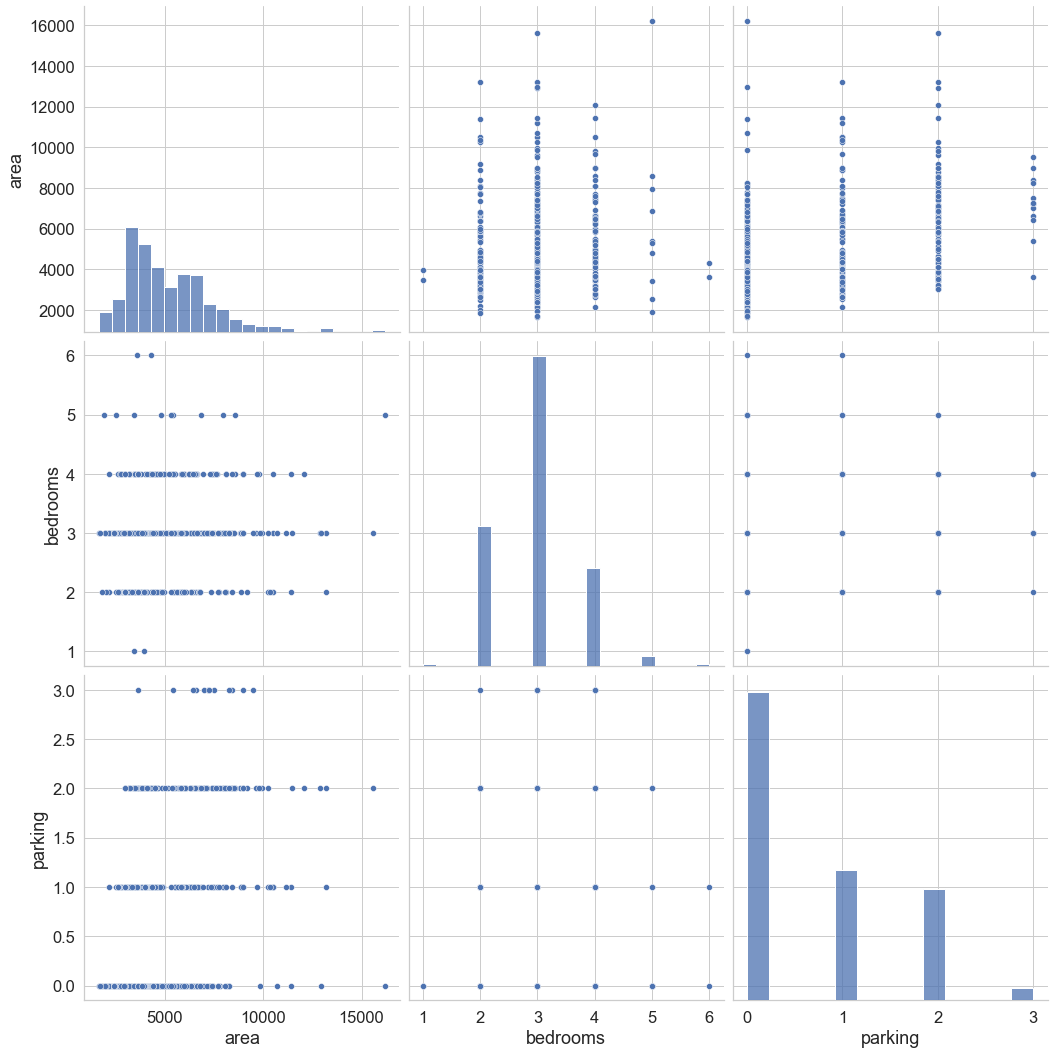

In [142]:
sns.pairplot(X,size=5)

<h1>Preprocessing the data by using this formula

$$x'= \frac{x - \mu}{\sigma}$$

In [143]:
X['area'] = (X.area - X.area.mean())/X.area.std()
X

/var/folders/0f/p7w7p9gd2n58tm6mb2jlgvj80000gn/T/ipykernel_20534/3964983066.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['area'] = (X.area - X.area.mean())/X.area.std()


,area,bedrooms,parking
0,1.045766,4,2
1,1.755397,4,3
2,2.216196,3,2
3,1.082630,4,3
4,1.045766,4,2
...,...,...,...
540,-0.990968,2,2
541,-1.267448,3,0
542,-0.705273,2,0
543,-1.032440,3,0


<h1>Linear-Regression Model 

In [144]:
class LineaRegression():

    def __init__(self,no_iterations,lr):
        self.no_iters = no_iterations
        self.lr = lr
    
    def _prediction(self,x):
        return np.dot(x,self.coffs)
    
    def loss(self,predict,y):
         sq_error = (predict-y)**2
         n = len(y)
         return 1.0 / (2*n) * sq_error.sum()
       
    def gradient_descent(self,X,Y):

        predictions = self._prediction(X)

        error = predictions - Y

        gradient = np.dot(X.T,error) / len(X)
        
        self.coffs -= self.lr * gradient

    def fit(self,indept,depdent):

        indept = np.c_[np.ones(indept.shape[0]), indept] 

        self.coffs = np.zeros(indept.shape[1])

        self.cost_history = []
        self.coffs_history = [self.coffs]

        for i in range(self.no_iters):

            y_prediction= self._prediction(indept)

            cost = self.loss(y_prediction,depdent)

            self.cost_history.append(cost)

            self.gradient_descent(indept,depdent)

            self.coffs_history.append(self.coffs.copy())
        return self
    
    def preditc(self,x):
         if(isinstance(x,list)):
            x = np.array(x)
         x = np.column_stack((np.ones(x.shape[0]),x))
         if(x.shape[1]-1==len(self.coffs)-1):
            predict = self.coffs*x
            return predict.sum(axis=1)
         else:
            return "Incorrect data size"

<h1>Simple Linear-Regression

In [157]:
clf = LineaRegression(no_iterations=100000,lr=0.1)
clf.fit(X['area'],Y)
clf.coffs

array([4766729.24770642, 1002550.66943053])

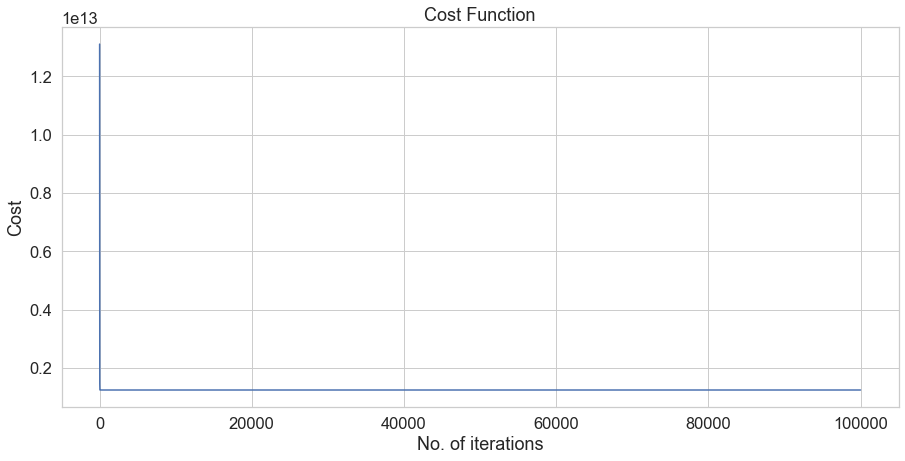

In [146]:
plt.figure(figsize=(15,7))
plt.title('Cost Function')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.plot(clf.cost_history)


<h1> Multi Linear Regression

In [156]:
clf = LineaRegression(no_iterations=100000,lr=0.1)
clf.fit(X,Y)
clf.coffs

array([2407758.41479792,  795070.26783964,  695986.57268264,
        425726.99068779])

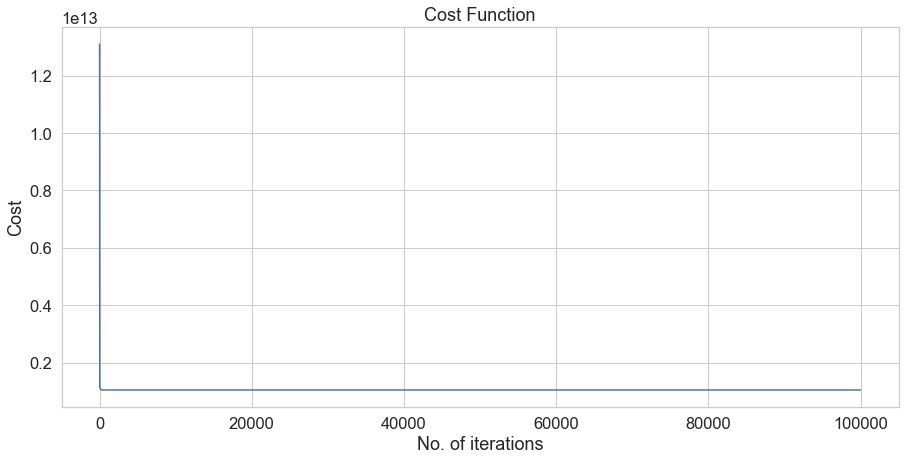

In [148]:
plt.figure(figsize=(15,7))
plt.title('Cost Function')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.plot(clf.cost_history)
